In [289]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy.optimize
import numpy as np

In [290]:
with open('./output/jouyou_kanji.txt', 'r', encoding='utf-8') as f:
    jouyou_kanji_list = f.read()


In [291]:
kanji_length_dict = pd.read_csv('./output/result_fixed.csv', index_col=0)


In [292]:
# 漢字の「一」の長さを3.75cmとして進める
kanji_length_dict['real_length'] = kanji_length_dict['length'] / kanji_length_dict.loc[kanji_length_dict['char'] == '一', 'length'].mean()
kanji_length_dict['real_length'] = kanji_length_dict['real_length'] * 3.75


In [293]:
kanji_length_dict['count_rank'] = kanji_length_dict['count'].rank(ascending=False)
kanji_length_dict['length_rank'] = kanji_length_dict['length'].rank(ascending=False)


In [294]:
jouyou_flag = kanji_length_dict['char'].str.match(f'[{jouyou_kanji_list}]')
jouyou_kanji_length_dict = kanji_length_dict[jouyou_flag]


In [295]:
jouyou_kanji_length_dict.loc[:, 'count_rank'] = jouyou_kanji_length_dict['count'].rank(ascending=False)
jouyou_kanji_length_dict.loc[:, 'length_rank'] = jouyou_kanji_length_dict['length'].rank(ascending=False)


In [296]:
# 画数ランキング
jouyou_kanji_length_dict.loc[:, ('char', 'count_rank', 'count')].sort_values('count_rank').head(20)


,char,count_rank,count
6433,鬱,1.0,29
5999,鑑,2.0,23
6385,驚,4.0,22
5220,襲,4.0,22
4192,籠,4.0,22
6446,魔,8.5,21
4703,艦,8.5,21
6575,鶴,8.5,21
6174,露,8.5,21
5589,躍,8.5,21


In [297]:
# 長さランキング(長さの単位はcm)
jouyou_kanji_length_dict.loc[:, ('char', 'length_rank', 'real_length')].sort_values('length_rank').head(20)


,char,length_rank,real_length
6433,鬱,1.0,30.176447
2889,欄,2.0,29.533381
5228,覇,3.0,29.292194
6273,顧,4.0,28.808493
4646,臓,5.0,28.553743
5848,醸,6.0,28.506696
6609,麓,7.0,28.399366
4449,羅,8.0,28.213856
5839,醜,9.0,27.937389
4240,糧,10.0,27.869116


In [298]:
jouyou_kanji_length_dict.sort_values('length_rank')['char'].str.cat()[:20]


'鬱欄覇顧臓醸麓羅醜糧魔縄彙躍騰麺髄醒璽構'

In [299]:
# 「襲」の順位
jouyou_kanji_length_dict.loc[jouyou_kanji_length_dict['char'] == '襲', ('char', 'count_rank', 'count', 'length_rank', 'real_length')]


,char,count_rank,count,length_rank,real_length
5220,襲,4.0,22,72.0,24.968503


In [300]:
def nonliner_curve(x, a, b, c):
    return a * np.exp(b * x) + c

def opt_func(param, x, y):
    return np.abs(y - nonliner_curve(x, *param)).sum()

# 外れ値に強いL1ノルムで非線形回帰を行う
result = scipy.optimize.minimize(opt_func, (-10, -1, 1000), args=(kanji_length_dict['count'], kanji_length_dict['real_length']), method='Nelder-Mead')
param = result.x

jouyou_result = scipy.optimize.minimize(opt_func, (-10, -1, 1000), args=(jouyou_kanji_length_dict['count'], jouyou_kanji_length_dict['real_length']), method='Nelder-Mead')
jouyou_param = jouyou_result.x


In [301]:
# 画数と長さの関係性を見てみよう！

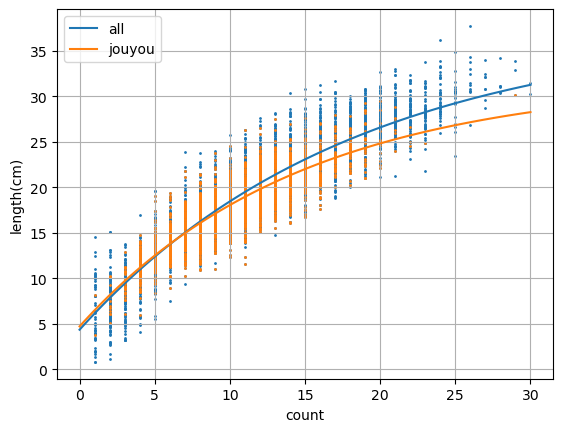

In [302]:
plt.grid()
plt.scatter(kanji_length_dict['count'], kanji_length_dict['real_length'], s=1)
plt.scatter(jouyou_kanji_length_dict['count'], jouyou_kanji_length_dict['real_length'], s=1)

x = np.linspace(0, kanji_length_dict['count'].max(), 100)
plt.plot(x, nonliner_curve(x, *param), label='all')
plt.plot(x, nonliner_curve(x, *jouyou_param), label='jouyou')

plt.xlabel('count')
plt.ylabel('length(cm)')
plt.legend()
plt.show()


In [303]:
kanji_cat_dict = kanji_length_dict.copy()
kanji_cat_dict['count'] = kanji_cat_dict['count'].astype('category').cat.set_categories(range(0, kanji_length_dict['count'].max() + 1))
jouyou_kanji_cat_dict = jouyou_kanji_length_dict.copy()
jouyou_kanji_cat_dict['count'] = jouyou_kanji_cat_dict['count'].astype('category').cat.set_categories(range(0, kanji_length_dict['count'].max() + 1))


In [307]:
# 次のグラフの方が見やすいかな？(バイオリンプロット)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


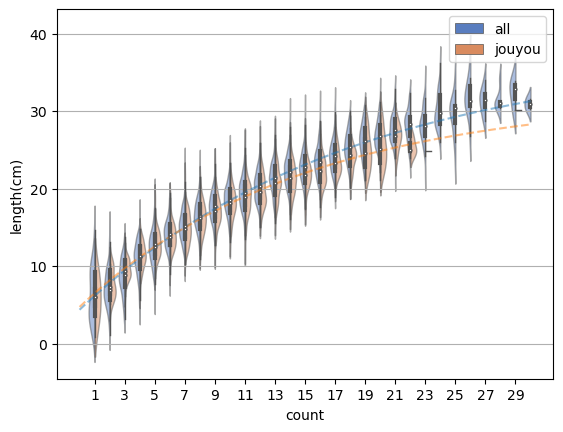

In [308]:
plt.grid()
#plt.violinplot([kanji_length_dict.loc[kanji_length_dict['count'] == i, 'length'] for i in range(1, kanji_length_dict['count'].max() + 1)])

def set_alpha(ax, a):
    for art in ax.get_children():
        if isinstance(art, matplotlib.collections.PolyCollection):
            art.set_alpha(a)

ax = sns.violinplot(data=kanji_cat_dict, x='count', y='real_length', palette='muted', alpha=0.5, linewidth=1, split=True, hue=True, hue_order=[True, False])
set_alpha(ax, 0.5)

ax = sns.violinplot(data=jouyou_kanji_cat_dict, x='count', y='real_length', palette='muted', alpha=0.5, linewidth=1, split=True, hue=False, hue_order=[True, False])
set_alpha(ax, 0.5)

ax.legend_ = None

x = np.linspace(0, kanji_length_dict['count'].max(), 100)
plt.plot(x, nonliner_curve(x, *param), linestyle='--', alpha=0.5, label='all')
plt.plot(x, nonliner_curve(x, *jouyou_param), linestyle='--', alpha=0.5, label='jouyou')

plt.xticks(range(1, kanji_length_dict['count'].max() + 1)[::2])

handler, label = ax.get_legend_handles_labels()
ax.legend(handler, ['all', 'jouyou'])

plt.ylabel('length(cm)')
plt.show()


In [309]:
# 画数に対して文字の長さを予想してみる
count = 1000
print(f'{count}画の文字がもしあったなら……文字を構成する線の長さはだいたい{nonliner_curve(count, *param)}cmくらい')
print(f'{count}画の常用漢字がもしあったなら……漢字を構成する線の長さはだいたい{nonliner_curve(count, *jouyou_param)}cmくらい')
# 「鬱」が約30cmだから、意外と短いね！画数が多いほど一画一画が短くなるため、あり得る結果


1000画の文字がもしあったなら……文字を構成する線の長さはだいたい37.634693214091cmくらい
1000画の常用漢字がもしあったなら……漢字を構成する線の長さはだいたい31.815549006874996cmくらい


In [306]:
# Thank you for seeing